# **Data Visualization**


Focusing on the visualization of data.

The data set will be presented in the form of a RDBMS.

Using SQL queries to extract the data.


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-07 12:19:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.3'

m4_survey_data.sqli 100%[===================>]  34.98M  40.3MB/s    in 0.9s    

2024-11-07 12:19:53 (40.3 MB/s) - 'm4_survey_data.sqlite.3' saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

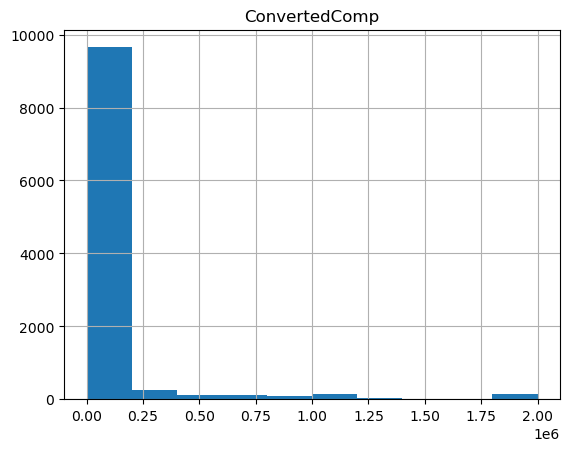

In [8]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.hist(column = 'ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

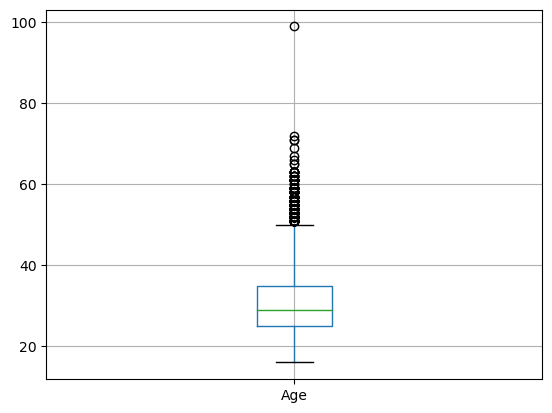

In [27]:
QUERY = """
SELECT Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column = 'Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


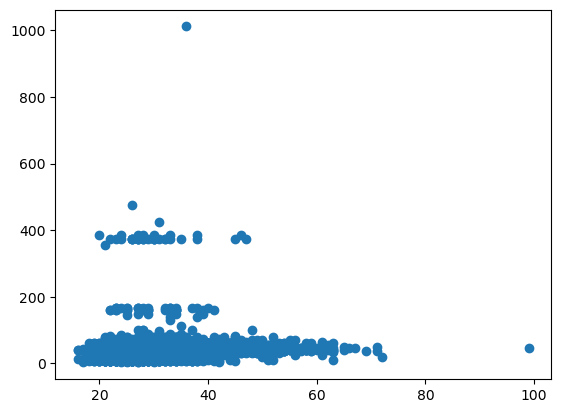

In [28]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
plt.scatter(data = df, x = 'Age', y = 'WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

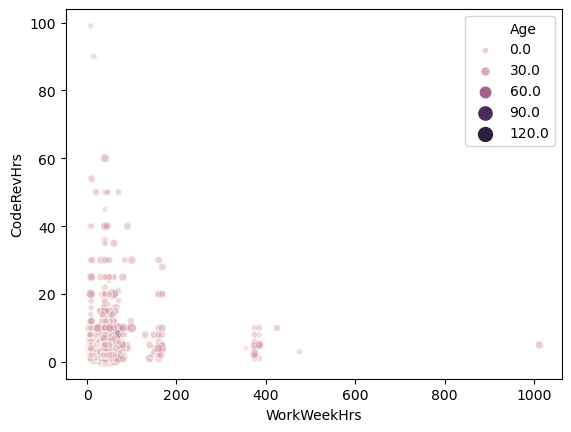

In [29]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
sns.scatterplot(data = df, x = 'WorkWeekHrs', y = 'CodeRevHrs', size = 'Age', hue = 'Age', alpha = 0.5, sizes=(10,100))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


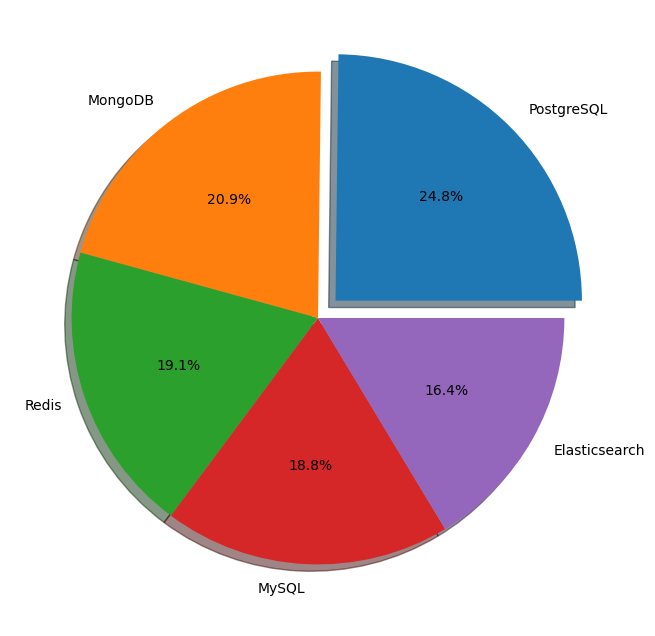

In [49]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

data = df['count']
labels = df['DatabaseDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
plt.show()

In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

In [9]:
QUERY = """select LanguageDesireNextYear, count(*) as languages
from LanguageDesireNextYear
group by LanguageDesireNextYear
order by languages desc
"""
df = pd.read_sql_query(QUERY,conn)

python_rank = df[df['LanguageDesireNextYear'] == 'Python'].index[0] + 1
print(f"The rank of Python in the list of most popular languages respondents wish to learn next year is: {python_rank}")

The rank of Python in the list of most popular languages respondents wish to learn next year is: 3


How many respondents indicated that they currently work with 'SQL'? 

In [43]:

QUERY = """select LanguageWorkedWith, count(*) as languagesworkedwith
from LanguageWorkedWith
where LanguageWorkedWith like '%SQL%'
"""
df = pd.read_sql_query(QUERY,conn)
num_respondents = df['languagesworkedwith'].iloc[0]
print(f"The number of respondents who indicated they currently work with SQL is: {num_respondents}")

The number of respondents who indicated they currently work with SQL is: 7106


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

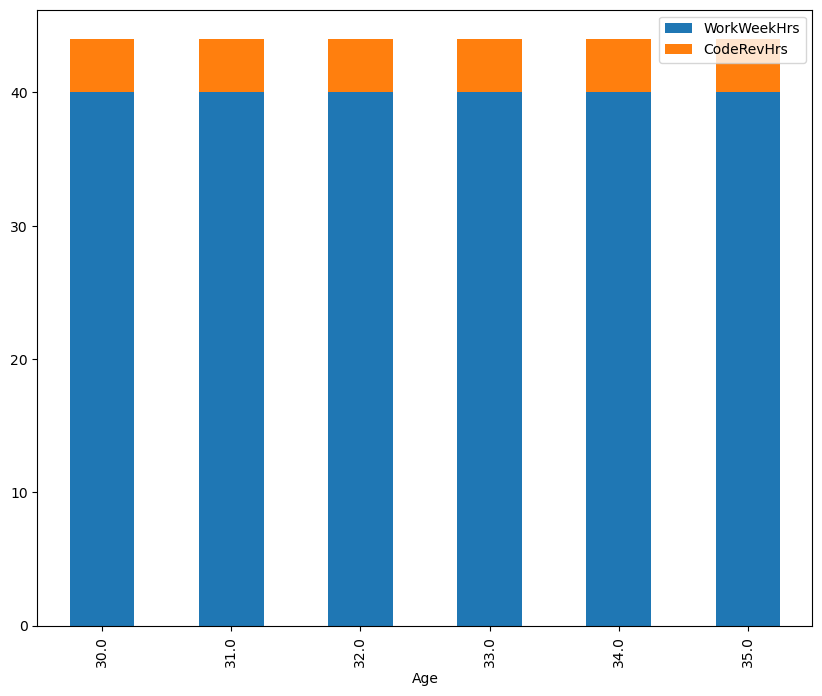

In [13]:


QUERY = """select WorkWeekHrs, CodeRevHrs, Age
from master
where Age between 30 and 35
"""

df = pd.read_sql_query(QUERY,conn)
median_values = df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

median_values.plot(kind = 'bar', stacked = True,  figsize=(10,8))

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

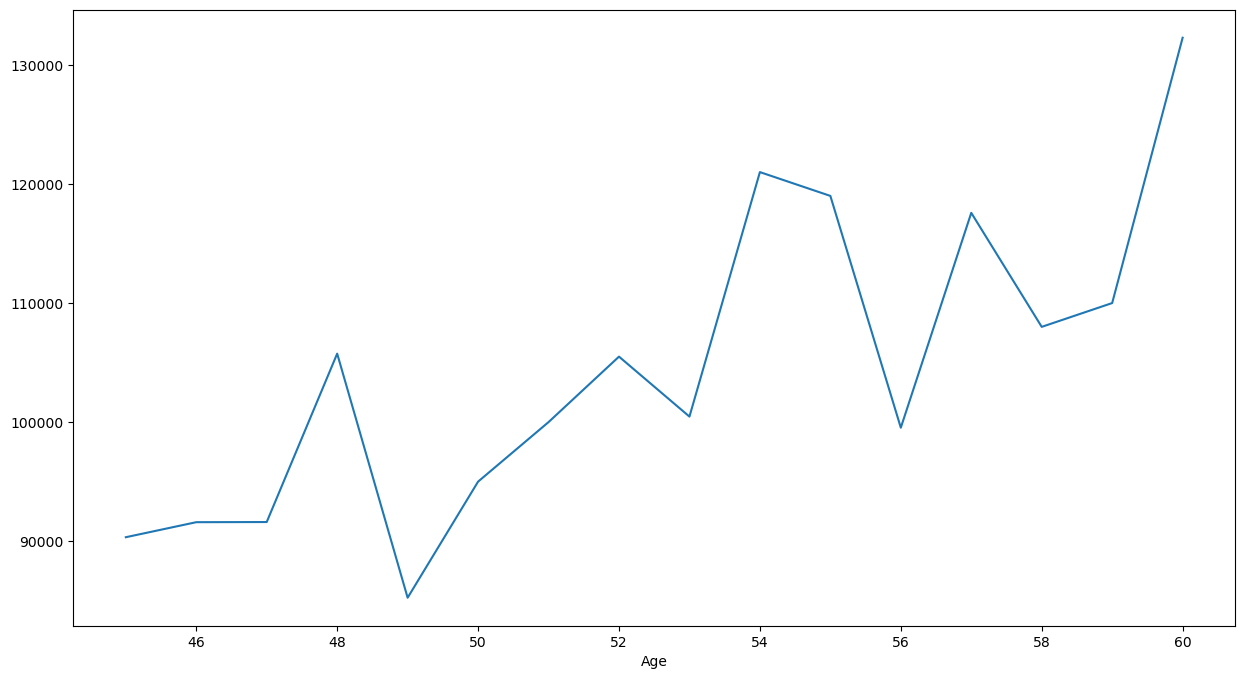

In [14]:

QUERY = """select ConvertedComp, Age
from master
where Age between 45 and 60
"""

df = pd.read_sql_query(QUERY,conn)
median_values = df.groupby('Age')['ConvertedComp'].median()

median_values.plot(kind = 'line', figsize=(15,8))

Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

<AxesSubplot:xlabel='Age'>

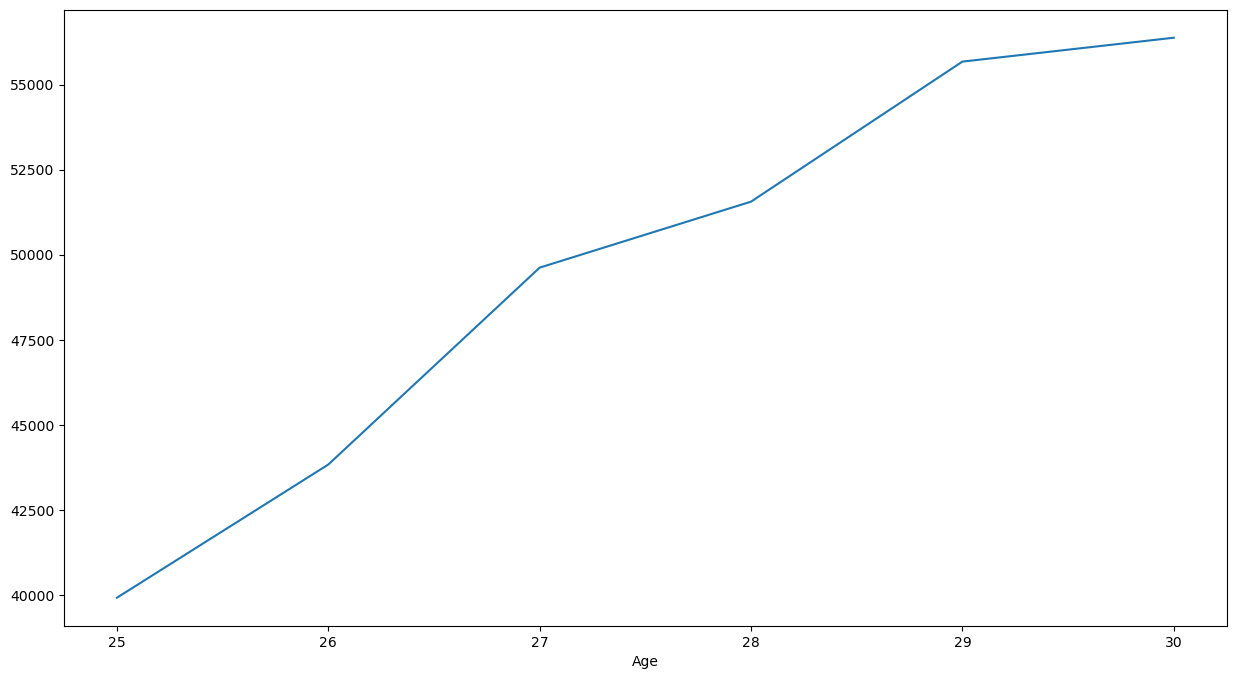

In [53]:

QUERY = """select ConvertedComp, Age
from master
where Age between 25 and 30
"""

df = pd.read_sql_query(QUERY,conn)
median_values = df.groupby('Age')['ConvertedComp'].median()

median_values.plot(kind = 'line', figsize=(15,8))

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

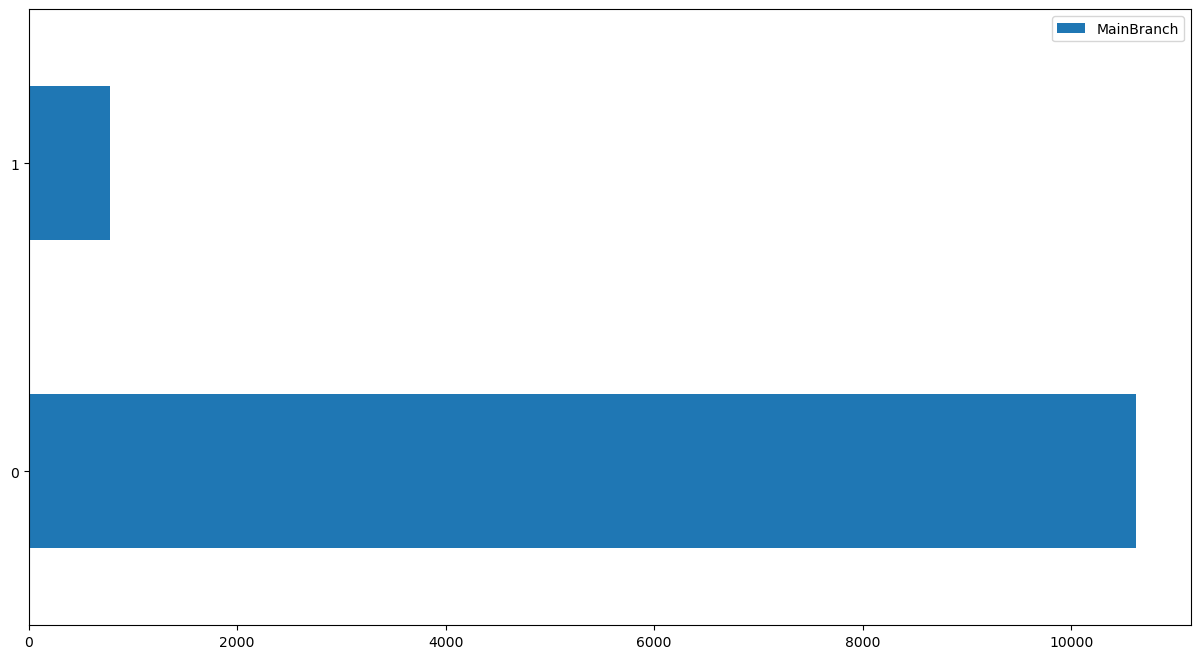

In [15]:

QUERY = """select MainBranch, count(*) as MainBranch
from master
group by MainBranch
"""

df = pd.read_sql_query(QUERY,conn)

df.plot(kind = 'barh', figsize=(15,8))

Majority of the survey responders are

In [52]:
QUERY = """
SELECT DevType, COUNT(*) as Count
FROM DevType
GROUP BY DevType
ORDER BY Count DESC

"""
pd.read_sql_query(QUERY,conn)

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


Close the database connection.


In [16]:
conn.close()